# Setting up the notebook

In [1]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd

# needed for representing dates and times
import datetime 
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# used for seeding random number sequences
seedval = 111111

# matplotlib 
import matplotlib as mpl
# matplotlib plotting functions
import matplotlib.pyplot as plt
# we want our plots linline
%matplotlib inline

# Creating time-series charts

## The basics of plotting with .plot()

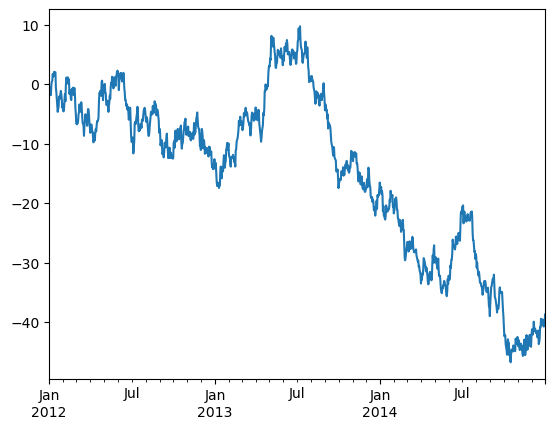

In [5]:
# generate a random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096),
              index=pd.date_range('2012-01-01', 
                                  '2014-12-31'))
walk_ts = s.cumsum()
# this plots the walk - just that easy :)
walk_ts.plot();

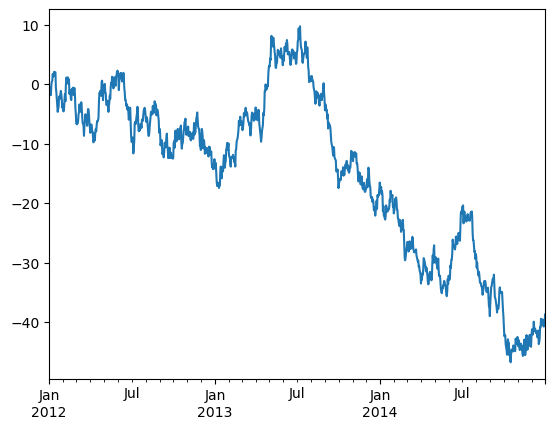

In [7]:
# tells pandas plots to use a default style
# which has a background fill
#pd.options.display.mpl_style = 'default'
walk_ts.plot();

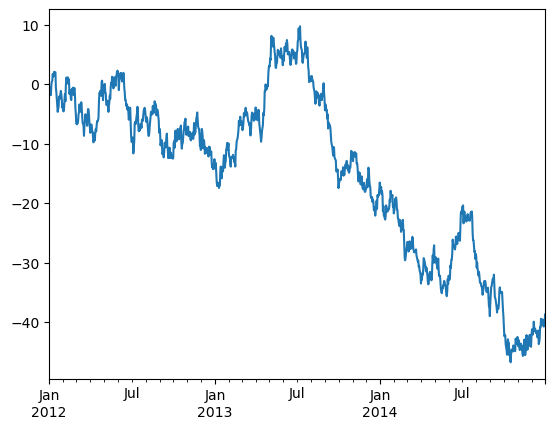

In [9]:
# a DataFrame with a single column will produce
# the same plot as plotting the Series it is created from
walk_df = pd.DataFrame(walk_ts)
walk_df.plot(legend=False);

In [11]:
# generate two random walks, one in each of 
# two columns in a DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), 
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

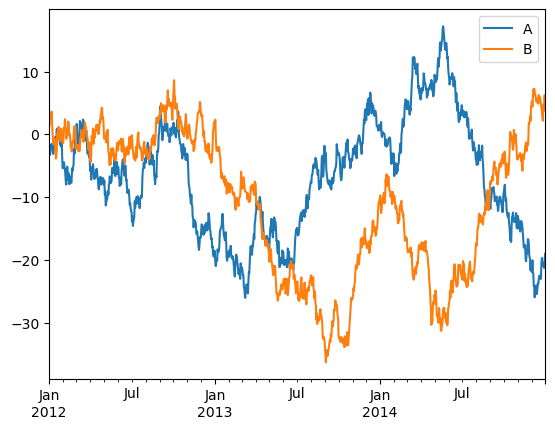

In [13]:
# plot the DataFrame, which will plot a line
# for each column, with a legend
walk_df.plot();

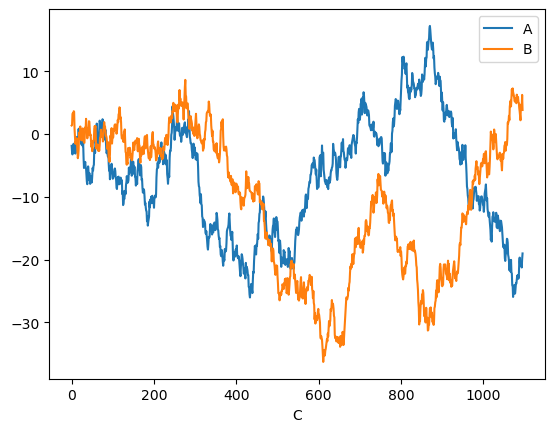

In [15]:
# copy the walk
df2 = walk_df.copy()
# add a column C which is 0 .. 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
# instead of dates on the x-axis, use the 'C' column,
# which will label the axis with 0..1000
df2.plot(x='C', y=['A', 'B']);

## Adorning and styling your time-series plot

### Adding a title and changing axes labels

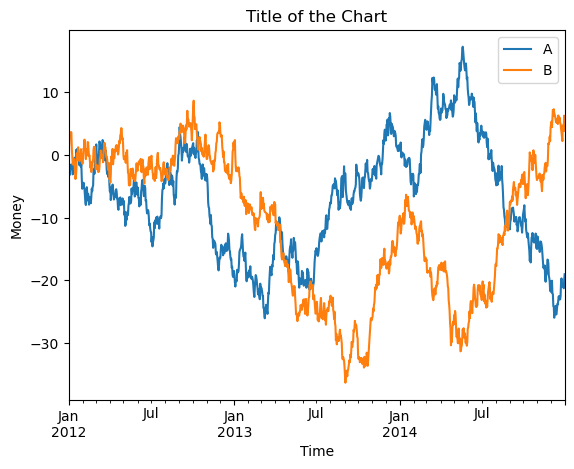

In [19]:
# create a time-series chart with a title and specific 
# x and y axis labels

# title is set in the .plot() method as a parameter
walk_df.plot(title='Title of the Chart')
# explicitly set the x and y axes labels after the .plot()
plt.xlabel('Time')
plt.ylabel('Money');

### Specifying legend content and position

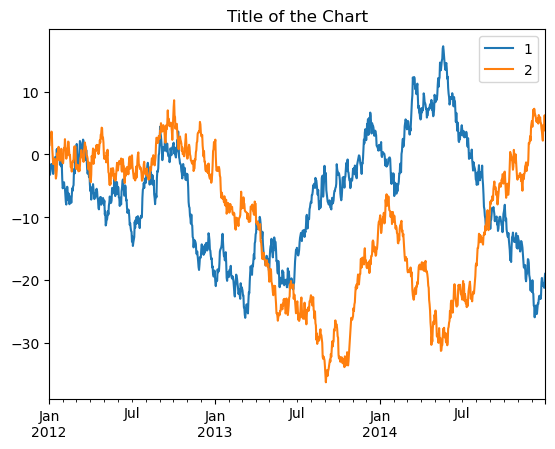

In [22]:
# change the legend items to be different 
# from the names of the columns in the DataFrame
ax = walk_df.plot(title='Title of the Chart')
# this sets the legend labels
ax.legend(['1', '2']);

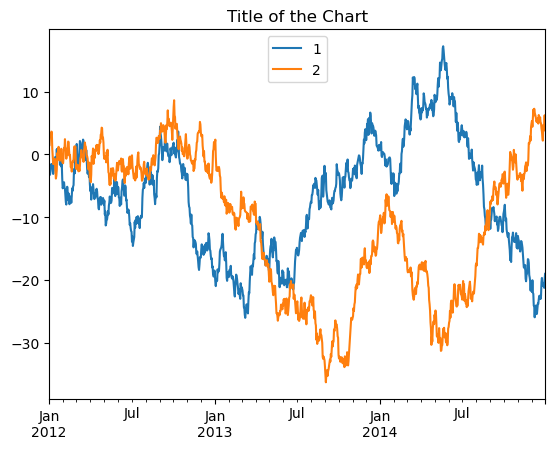

In [24]:
# change the position of the legend
ax = walk_df.plot(title='Title of the Chart')
# put the legend in the upper center of the chart
ax.legend(['1', '2'], loc='upper center');

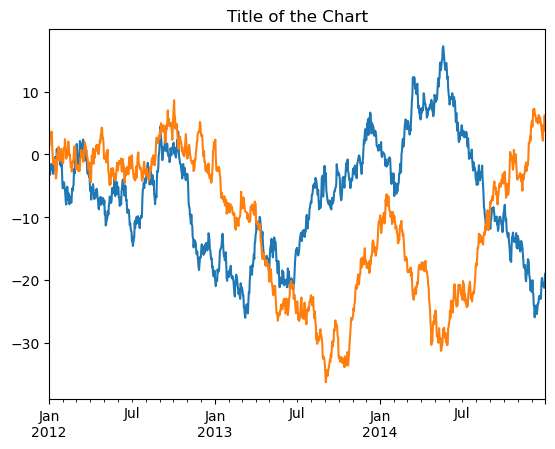

In [26]:
# omit the legend by using legend=False
walk_df.plot(title='Title of the Chart', legend=False);

### Specifying line colors, styles, thickness and markers

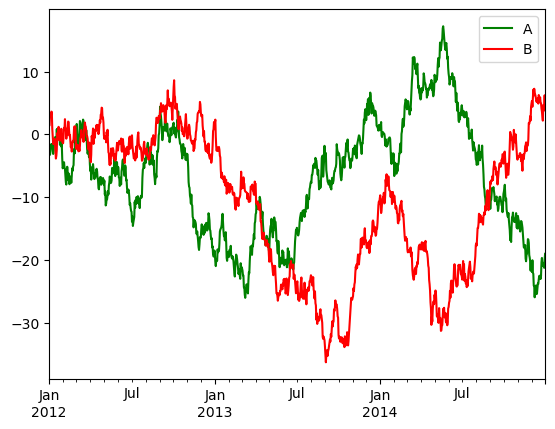

In [29]:
# change the line colors on the plot
# use character code for the first line, 
# hex RGB for the second
walk_df.plot(style=['g', '#FF0000']);

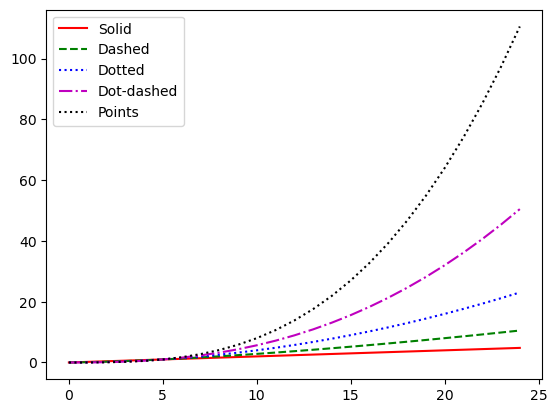

In [31]:
# show off different line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 
                 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                           1 : t**1.5,
                           2 : t**2.0,
                           3 : t**2.5,
                           4 : t**3.0})
# generate the plot, specifying color and line style for each line
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
# set the legend
ax.legend(legend_labels, loc='upper left');

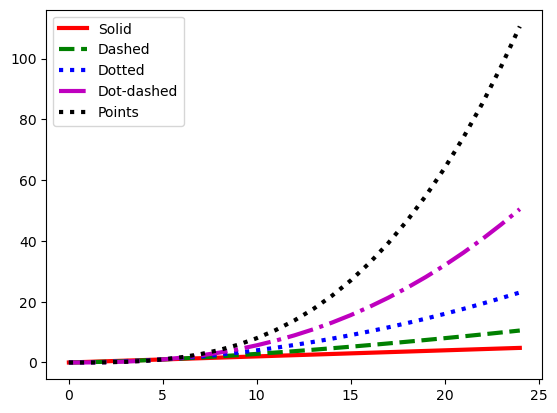

In [33]:
# regenerate the plot, specifying color and line style 
# for each line and a line width of 3 for all lines
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left');

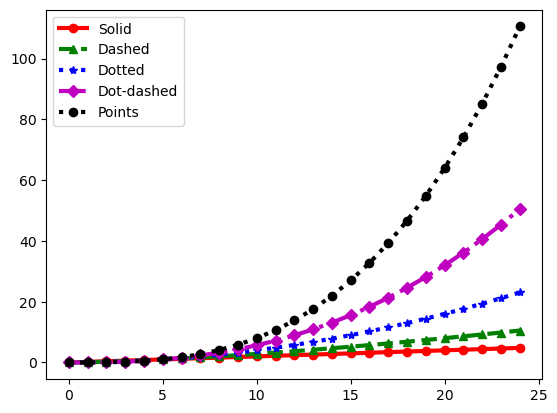

In [35]:
# redraw, adding markers to the lines
ax = line_style.plot(style=['r-o', 'g--^', 'b:*', 
                            'm-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

### Specifying tick mark locations and tick labels

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

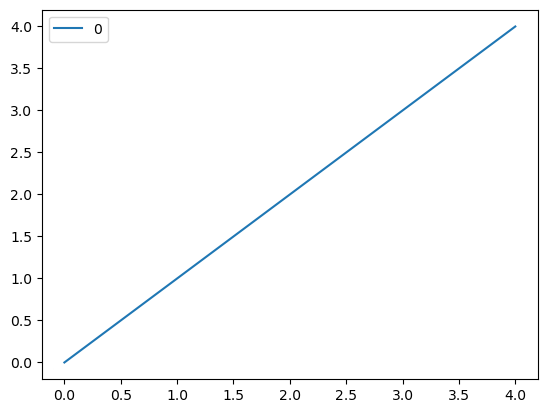

In [38]:
# a simple plot to use to examine ticks
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks

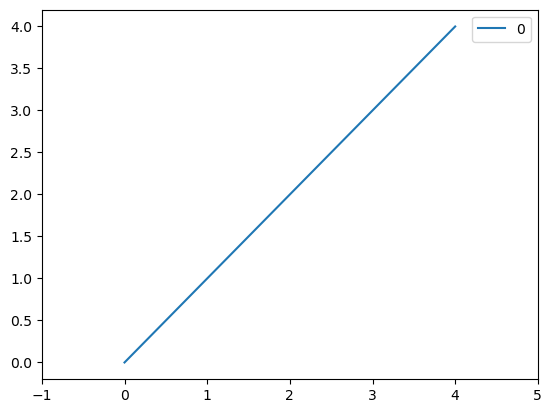

In [40]:
# resize x-axis to (-1, 5), and draw ticks
# only at integer values
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6));

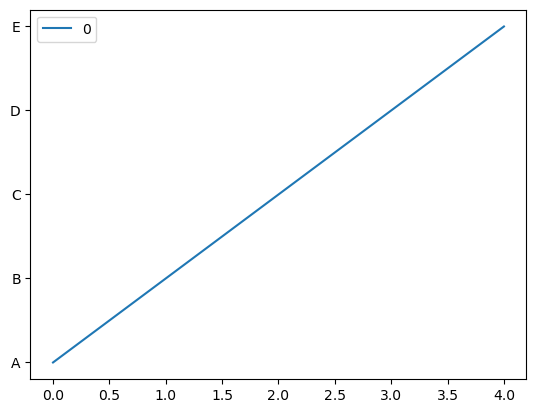

In [42]:
# rename y-axis tick labels to A, B, C, D, and E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list("ABCDE"));

### Formatting axes tick date labels using formatters

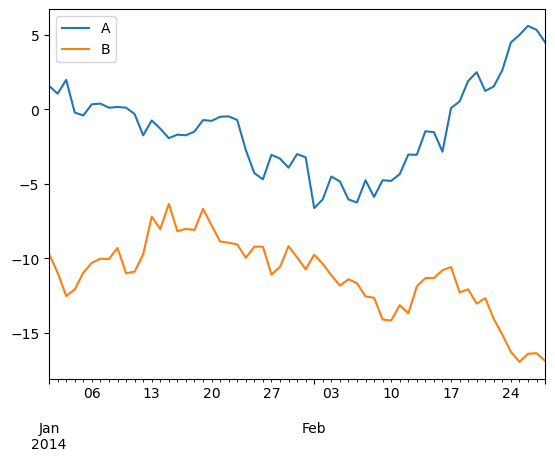

In [45]:
# plot January-February 2014 from the random walk
walk_df.loc['2014-01':'2014-02'].plot();

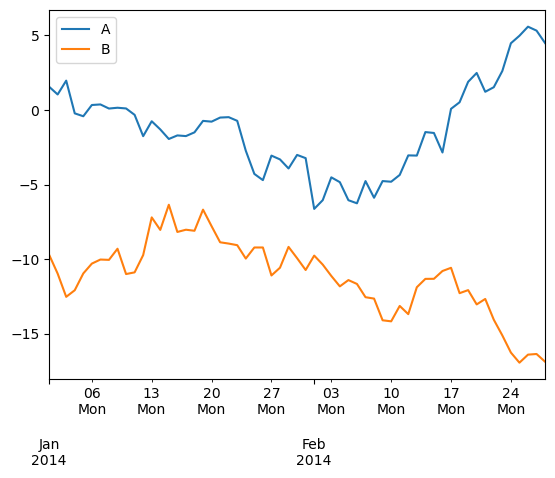

In [47]:
# this import styles helps us type less
from matplotlib.dates import WeekdayLocator, \
DateFormatter, MonthLocator

# plot Jan-Feb 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

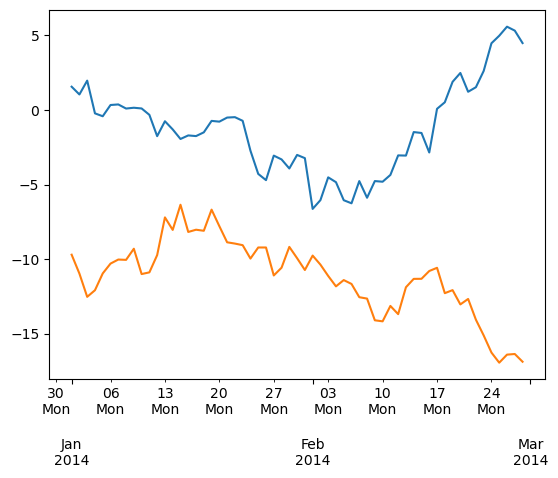

In [49]:
# this gets around the pandas / matplotlib year issue
# need to reference the subset twice, so let's make a variable
walk_subset = walk_df['2014-01':'2014-02']

# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

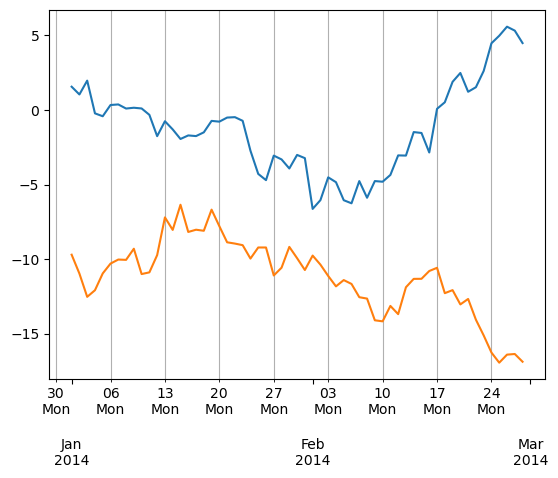

In [51]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, "minor") # turn on minor tick grid lines
ax.xaxis.grid(False, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

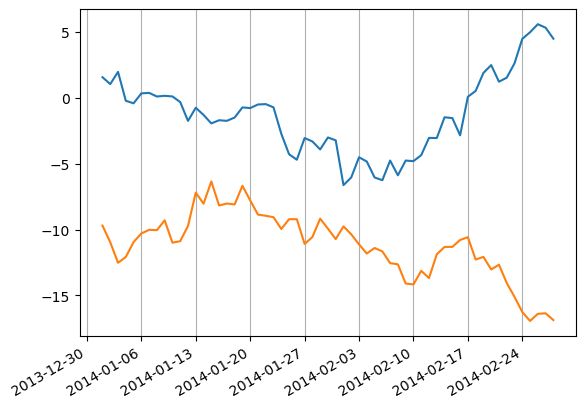

In [53]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

ax.xaxis.grid(True, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# informs to rotate date labels
fig.autofmt_xdate();

# Common plots used in statistical analyses

## Bar plots

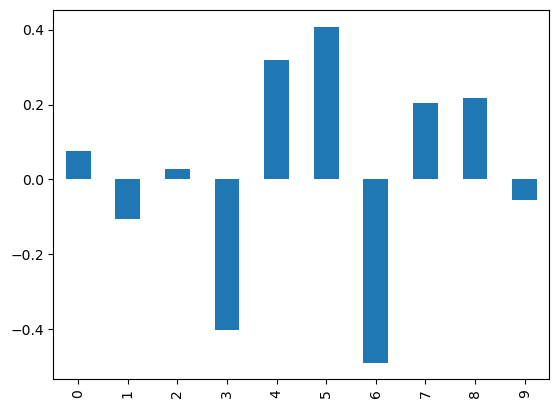

In [57]:
# make a bar plot
# create a small series of 10 random values centered at 0.0
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)
# plot the bar chart
s.plot(kind='bar');

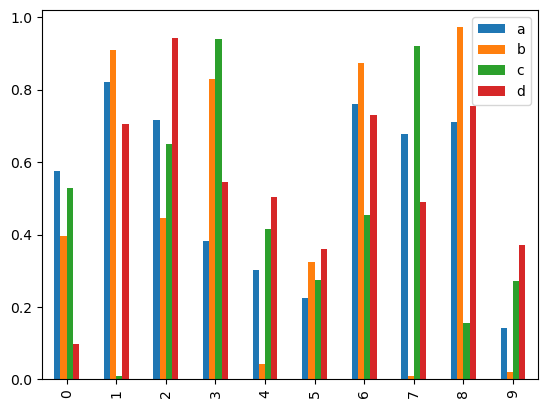

In [59]:
# draw a multiple series bar chart
# generate 4 columns of 10 random values
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# draw the multi-series bar chart
df2.plot(kind='bar');

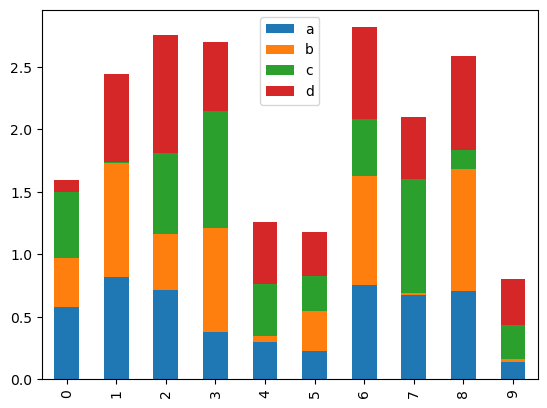

In [61]:
# horizontal stacked bar chart
df2.plot(kind='bar', stacked=True);

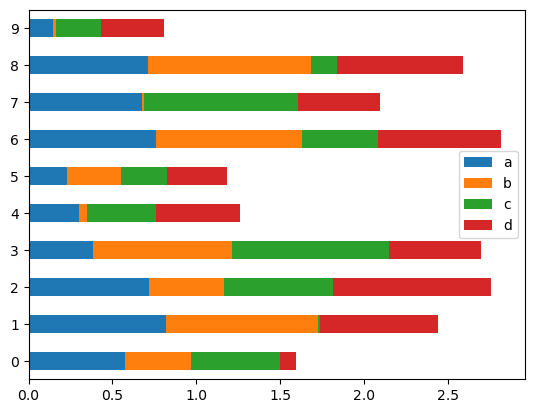

In [63]:
# horizontal stacked bar chart
df2.plot(kind='barh', stacked=True);

## Histograms

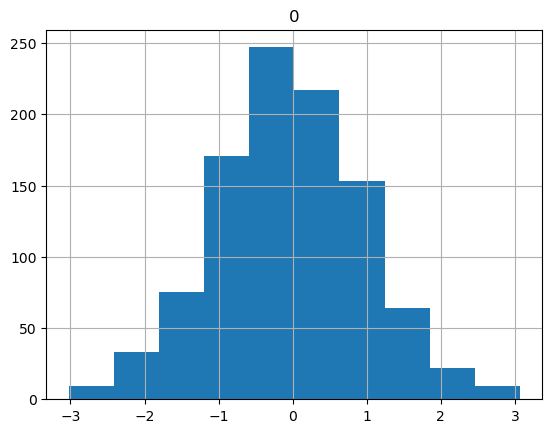

In [66]:
# create a histogram
np.random.seed(seedval)
# 1000 random numbers
dfh = pd.DataFrame(np.random.randn(1000))
# draw the histogram
dfh.hist();

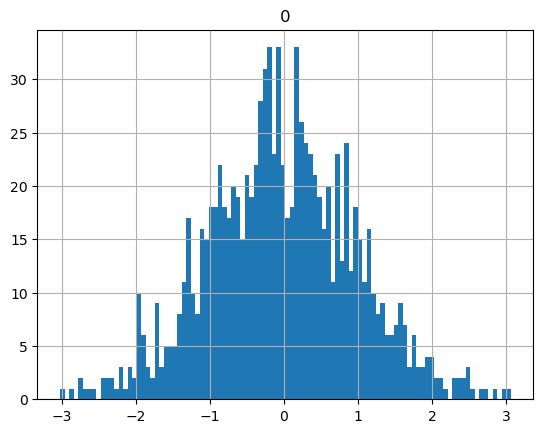

In [68]:
# histogram again, but with more bins
dfh.hist(bins = 100);

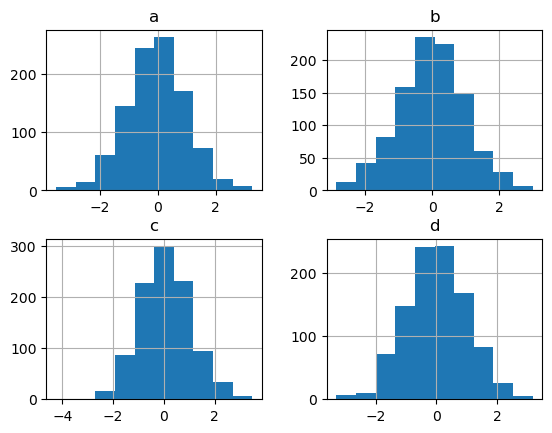

In [70]:
# generate multiple histogram plot
# create data frame with 4 columns of 1000 random values
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4), 
                   columns=['a', 'b', 'c', 'd'])
# draw the chart.  There are four columns so pandas draws
# four historgrams
dfh.hist();

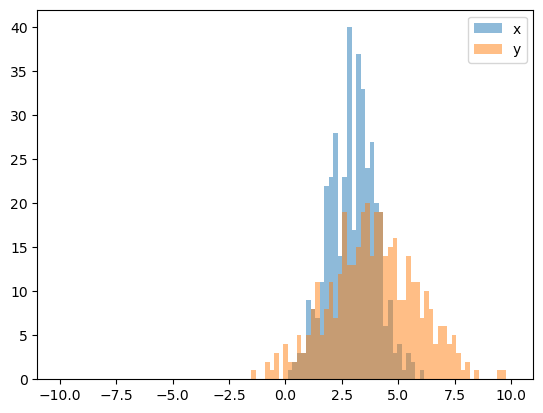

In [72]:
# directly use pyplot to overlay multiple histograms
# generate two distributions, each with a different
# mean and standard deviation
np.random.seed(seedval)
x = [np.random.normal(3,1) for _ in range(400)]
y = [np.random.normal(4,2) for _ in range(400)]

# specify the bins (-10 to 10 with 100 bins)
bins = np.linspace(-10, 10, 100)

# generate plot x using plt.hist, 50% transparent
plt.hist(x, bins, alpha=0.5, label='x')
# generate plot y using plt.hist, 50% transparent
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right');

## Box and whisker plots

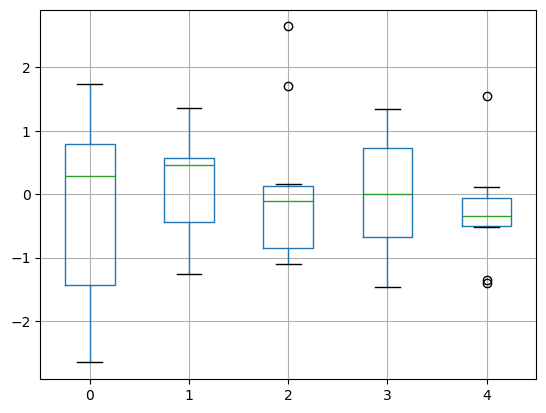

In [75]:
# create a box plot
# generate the series
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10,5))
# generate the plot
dfb.boxplot(return_type='axes');

## Area plots

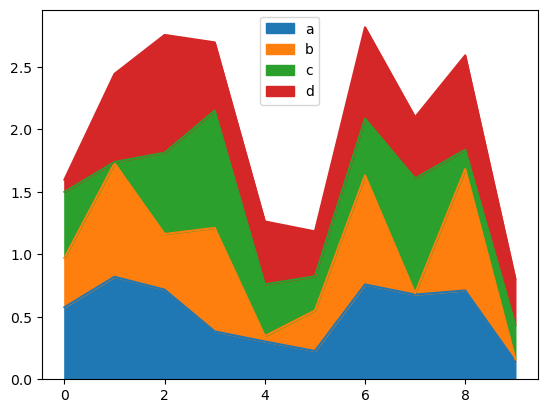

In [78]:
# create a stacked area plot
# generate a 4-column data frame of random data
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# create the area plot
dfa.plot(kind='area');

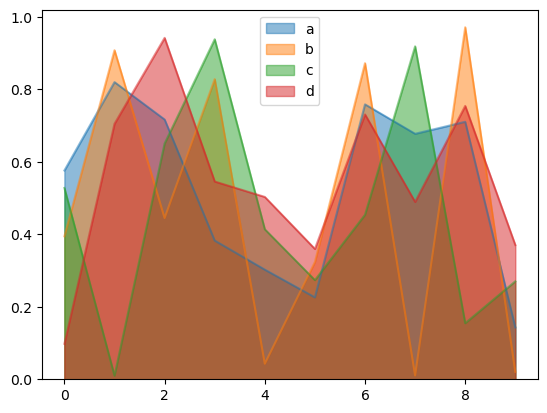

In [80]:
# do not stack the area plot
dfa.plot(kind='area', stacked=False);

## Scatter plots

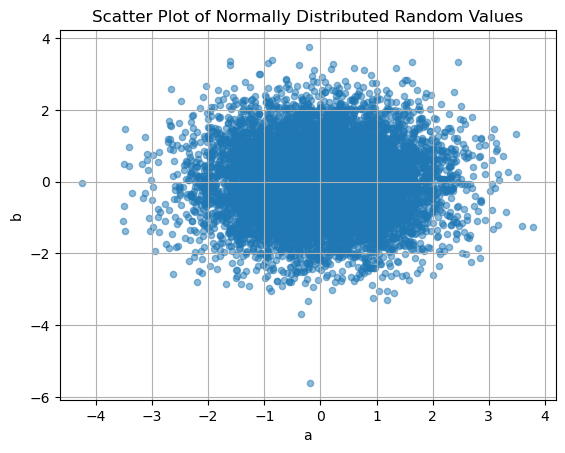

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(111111)

# Generate normally distributed random values
random_values = np.random.randn(10000, 2)

# Create a DataFrame with the random values
sp_df = pd.DataFrame(random_values, columns=['a', 'b'])

# Generate a scatter plot
sp_df.plot(kind='scatter', x='a', y='b', alpha=0.5)
plt.title("Scatter Plot of Normally Distributed Random Values")
plt.xlabel("a")
plt.ylabel("b")
plt.grid(True)
plt.show()


In [89]:
# get Google stock data from 1/1/2011 to 12/31/2011
from pandas.io.data import DataReader
stock_data = DataReader("GOOGL", "yahoo", 
                        datetime(2011, 1, 1), 
                        datetime(2011, 12, 31))

# % change per day
delta = np.diff(stock_data["Adj Close"])/stock_data["Adj Close"][:-1]

# this calculates size of markers
volume = (15 * stock_data.Volume[:-2] / stock_data.Volume[0])**2
close = 0.003 * stock_data.Close[:-2] / 0.003 * stock_data.Open[:-2]

# generate scatter plot
fig, ax = plt.subplots()
ax.scatter(delta[:-1], delta[1:], c=close, s=volume, alpha=0.5)

# add some labels and style
ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and percent change')
ax.grid(True);

ModuleNotFoundError: No module named 'pandas.io.data'

## Density plot (kde)

d:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


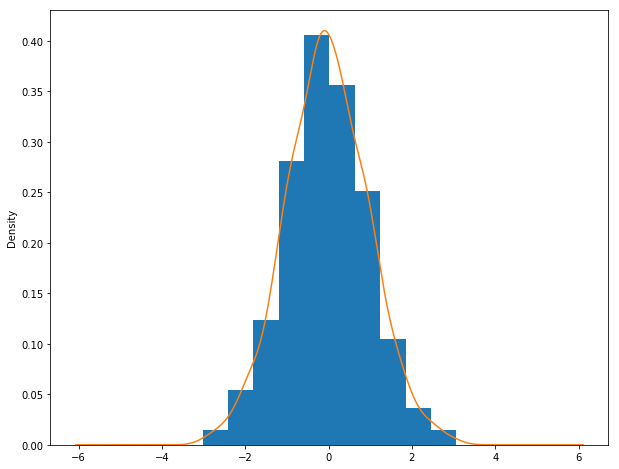

In [56]:
# create a kde densitiy plot
# generate a series of 1000 random numbers
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
# generate the plot
s.hist(normed=True) # shows the bars
s.plot(kind='kde', figsize=(10,8));

## Scatter plot matrix

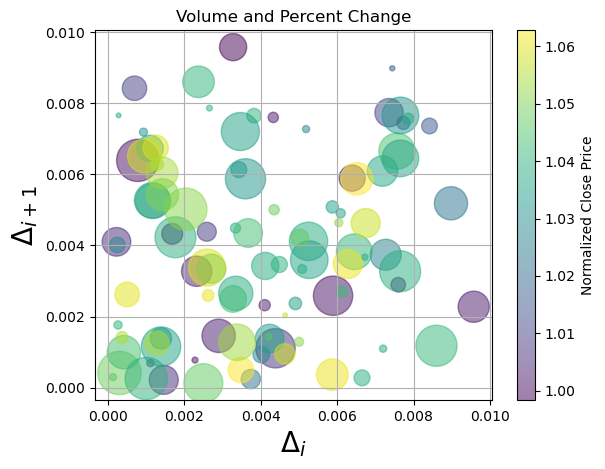

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample stock data creation (assuming 'stock_data' has 'Adj Close', 'Volume', 'Close', 'Open')
dates = pd.date_range('2021-01-01', periods=100)
np.random.seed(111)
stock_data = pd.DataFrame({
    'Adj Close': np.random.rand(100).cumsum() + 100,
    'Volume': np.random.randint(1000, 10000, size=100),
    'Close': np.random.rand(100).cumsum() + 100,
    'Open': np.random.rand(100).cumsum() + 100
}, index=dates)

# % change per day
delta = np.diff(stock_data["Adj Close"])/stock_data["Adj Close"][:-1]

# This calculates size of markers
volume = (15 * stock_data.Volume[:-2] / stock_data.Volume.iloc[0])**2
close = 0.003 * stock_data.Close[:-2] / (0.003 * stock_data.Open[:-2])

# Generate scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(delta[:-1], delta[1:], c=close, s=volume, alpha=0.5, cmap='viridis')

# Add some labels and style
ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and Percent Change')
ax.grid(True)

# Add color bar to represent the close prices
cbar = plt.colorbar(scatter)
cbar.set_label('Normalized Close Price')

plt.show()


## Heatmaps

In [93]:
# create a heatmap
# start with data for the heatmap
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A' : s + 0.0,
                             'B' : s + 0.1,
                             'C' : s + 0.2,
                             'D' : s + 0.3,
                             'E' : s + 0.4,
                             'F' : s + 0.5,
                             'G' : s + 0.6
                     })
heatmap_data

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

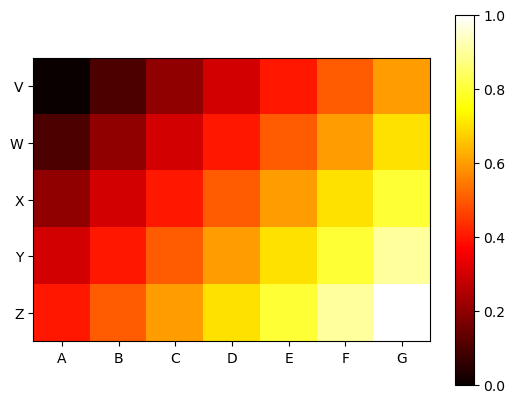

In [95]:
# generate the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='none')
plt.colorbar()  # add the scale of colors bar
# set the labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

# Multiple Plots in a Single Chart

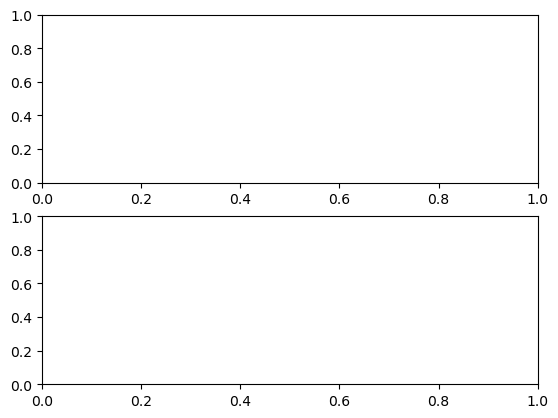

In [98]:
# create two sub plots on the new plot using a 2x1 grid
# ax1 is the upper row
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
# and ax2 is in the lower row
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

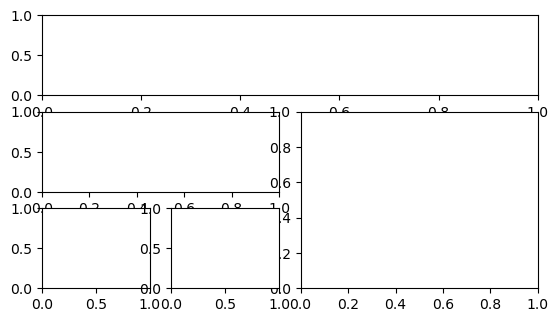

In [100]:
# layout sub plots on a 4x4 grid
# ax1 on top row, 4 columns wide
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)
# ax2 is row 2, leftmost and 2 columns wide
ax2 = plt.subplot2grid((4,4), (1,0), colspan=2)
# ax3 is 2 cols wide and 2 rows high, starting
# on second row and the third column
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=2)
# ax4 1 high 1 wide, in row 4 column 0
ax4 = plt.subplot2grid((4,4), (2,0))
# ax4 1 high 1 wide, in row 4 column 1
ax5 = plt.subplot2grid((4,4), (2,1));

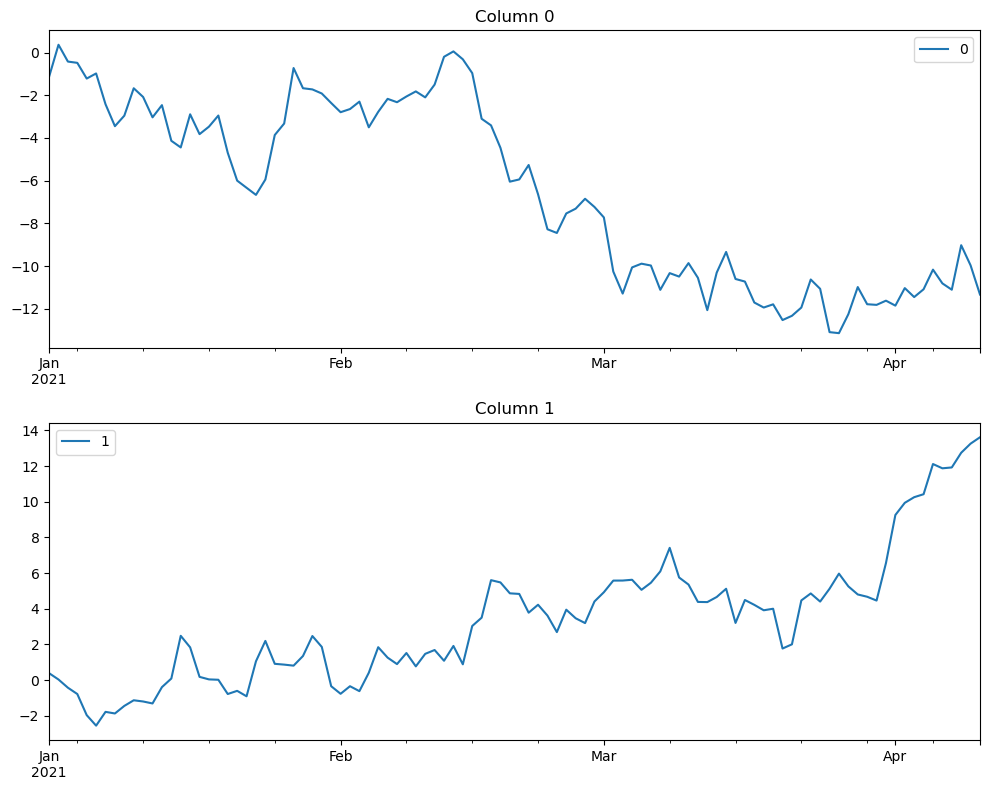

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame creation (assuming 'walk_df' has two columns)
dates = pd.date_range('2021-01-01', periods=100)
np.random.seed(111)
walk_df = pd.DataFrame(np.random.randn(100, 2).cumsum(axis=0), index=dates, columns=[0, 1])

# Generate a layout of 2 rows and 1 column
fig = plt.figure(figsize=(10, 8))

# Create the subplots, one on each row
ax5 = plt.subplot2grid((2, 1), (0, 0))
ax6 = plt.subplot2grid((2, 1), (1, 0))

# Plot column 0 of walk_df into the top row of the grid
walk_df[[0]].plot(ax=ax5, title='Column 0')
ax5.set_xlabel('')  # Remove the x-label to avoid overlap

# Plot column 1 of walk_df into the bottom row
walk_df[[1]].plot(ax=ax6, title='Column 1')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


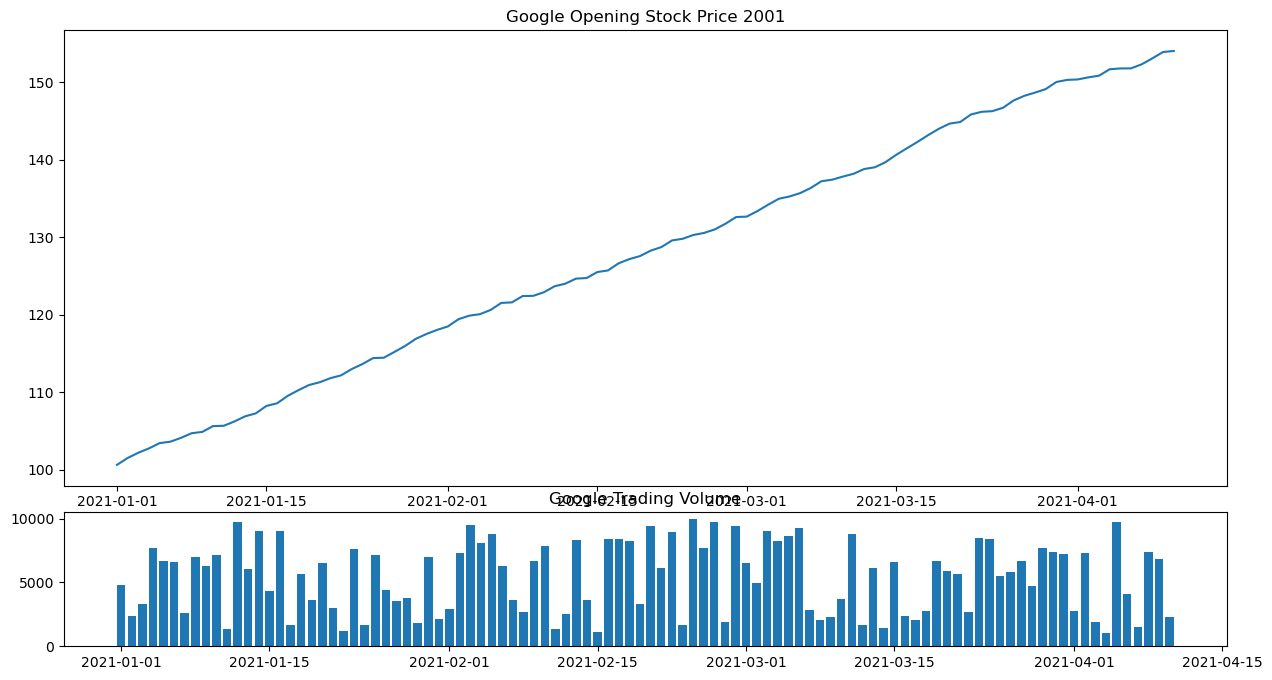

In [106]:
# draw the close on the top chart
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(stock_data.index, stock_data['Close'], label='Close')
plt.title('Google Opening Stock Price 2001')

# draw the volume chart on the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(stock_data.index, stock_data['Volume'])
plt.title('Google Trading Volume')

# set the size of the plot
plt.gcf().set_size_inches(15,8)